In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

41


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.43866 stdev: 0.21288
Best fitness: 0.82498 - size: (2, 13) - species 6 - id 110
Average adjusted fitness: 0.258
Mean genetic distance 2.920, standard deviation 0.447
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.299 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57757 stdev: 0.21978
Best fitness: 0.84354 - size: (3, 15) - species 3 - id 333
Average adjusted fitness: 0.361
Mean genetic distance 2.952, standard deviation 0.476
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.667 sec (5.983 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63600 stdev: 0.20373
Best fitness: 0.84848 - size: (2, 15) - species 5 - id 528
Average adjusted fitness: 0.381
Mean genetic distance 2.956, standard deviation 0.470
Population of 206 members in 29 species
Total extincti

Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.894 sec (6.728 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65289 stdev: 0.11808
Best fitness: 0.78231 - size: (2, 14) - species 6 - id 235
Average adjusted fitness: 0.368
Mean genetic distance 3.115, standard deviation 0.487
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 6.818 sec (6.889 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64626 stdev: 0.12168
Best fitness: 0.78231 - size: (2, 14) - species 6 - id 235
Average adjusted fitness: 0.347
Mean genetic distance 3.124, standard deviation 0.493
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.730 sec (7.064 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63872 stdev: 0.13503
Best fitness: 0.78231 - size: (2, 14) - species 6 - id 235
Average adjusted fitness: 0.345
Mean genetic distance 3.126,

Generation time: 6.215 sec (5.818 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65886 stdev: 0.12043
Best fitness: 0.82684 - size: (5, 21) - species 23 - id 784
Average adjusted fitness: 0.430
Mean genetic distance 3.016, standard deviation 0.479
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 7.743 sec (6.203 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66546 stdev: 0.12435
Best fitness: 0.84106 - size: (4, 17) - species 14 - id 974
Average adjusted fitness: 0.377
Mean genetic distance 3.031, standard deviation 0.468
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.093 sec (6.518 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66018 stdev: 0.13153
Best fitness: 0.84106 - size: (4, 17) - species 14 - id 974
Average adjusted fitness: 0.372
Mean genetic distance 3.091, standard deviation 0.473
Population of 193 members in 31 spe

Population's average fitness: 0.62234 stdev: 0.08868
Best fitness: 0.79654 - size: (8, 25) - species 20 - id 1958
Average adjusted fitness: 0.240
Mean genetic distance 3.209, standard deviation 0.495
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.810 sec (7.035 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62514 stdev: 0.08706
Best fitness: 0.79654 - size: (8, 25) - species 20 - id 1958
Average adjusted fitness: 0.222
Mean genetic distance 3.194, standard deviation 0.500
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.411 sec (7.131 average)
number of class1:1137
number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.44820 stdev: 0.14163
Best fitness: 0.76623 - size: (2, 13) - species 1 - id 12
Average adjusted fitness: 0.171
Mean genetic distance 2.924, standard deviation 0.467
Population of 200 members in 26 species
Total extinctions: 0
Generation t

Population's average fitness: 0.60898 stdev: 0.09459
Best fitness: 0.75201 - size: (3, 15) - species 17 - id 521
Average adjusted fitness: 0.253
Mean genetic distance 3.149, standard deviation 0.494
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 7.624 sec (6.323 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60567 stdev: 0.10217
Best fitness: 0.75201 - size: (3, 15) - species 17 - id 521
Average adjusted fitness: 0.274
Mean genetic distance 3.147, standard deviation 0.473
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 9.482 sec (6.674 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60778 stdev: 0.10463
Best fitness: 0.75572 - size: (3, 15) - species 17 - id 1449
Average adjusted fitness: 0.242
Mean genetic distance 3.151, standard deviation 0.466
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 7.949 sec (6.802 average)

 ****** Run

Population's average fitness: 0.53187 stdev: 0.08090
Best fitness: 0.71738 - size: (2, 14) - species 14 - id 261
Average adjusted fitness: 0.178
Mean genetic distance 3.009, standard deviation 0.509
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 5.743 sec (5.486 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55574 stdev: 0.08049
Best fitness: 0.71738 - size: (2, 14) - species 14 - id 261
Average adjusted fitness: 0.163
Mean genetic distance 3.003, standard deviation 0.488
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.862 sec (5.612 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56642 stdev: 0.07679
Best fitness: 0.71738 - size: (2, 14) - species 3 - id 261
Average adjusted fitness: 0.199
Mean genetic distance 3.049, standard deviation 0.495
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 6.276 sec (5.778 average)

 ****** Runni

Population's average fitness: 0.65603 stdev: 0.12452
Best fitness: 0.81323 - size: (5, 19) - species 23 - id 1331
Average adjusted fitness: 0.357
Mean genetic distance 3.216, standard deviation 0.466
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 7.186 sec (6.444 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65858 stdev: 0.12192
Best fitness: 0.81323 - size: (5, 19) - species 23 - id 1331
Average adjusted fitness: 0.354
Mean genetic distance 3.216, standard deviation 0.467
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 8.451 sec (6.739 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65306 stdev: 0.13704
Best fitness: 0.81323 - size: (5, 19) - species 23 - id 1331
Average adjusted fitness: 0.370
Mean genetic distance 3.217, standard deviation 0.472
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 7.145 sec (6.873 average)

 ******

Population's average fitness: 0.69943 stdev: 0.17384
Best fitness: 0.86024 - size: (4, 18) - species 4 - id 535
Average adjusted fitness: 0.481
Mean genetic distance 3.039, standard deviation 0.464
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 20.553 sec (20.947 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66691 stdev: 0.19451
Best fitness: 0.86024 - size: (4, 18) - species 4 - id 535
Average adjusted fitness: 0.462
Mean genetic distance 3.065, standard deviation 0.483
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 21.020 sec (20.959 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69606 stdev: 0.18107
Best fitness: 0.86024 - size: (4, 18) - species 4 - id 535
Average adjusted fitness: 0.480
Mean genetic distance 3.061, standard deviation 0.481
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 20.526 sec (20.897 average)

 ****** R

Population's average fitness: 0.62172 stdev: 0.08472
Best fitness: 0.75263 - size: (6, 21) - species 28 - id 1772
Average adjusted fitness: 0.268
Mean genetic distance 3.258, standard deviation 0.473
Population of 200 members in 49 species
Total extinctions: 0
Generation time: 36.706 sec (33.737 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62758 stdev: 0.08244
Best fitness: 0.75263 - size: (6, 21) - species 28 - id 1772
Average adjusted fitness: 0.237
Mean genetic distance 3.252, standard deviation 0.472
Population of 194 members in 51 species
Total extinctions: 0
Generation time: 35.381 sec (34.211 average)
number of class1:815
number of class2:802

 ****** Running generation 0 ****** 

Population's average fitness: 0.50505 stdev: 0.06992
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 20
Average adjusted fitness: 0.175
Mean genetic distance 2.891, standard deviation 0.454
Population of 200 members in 23 species
Total extinctions: 0
Generatio

Population's average fitness: 0.58309 stdev: 0.07913
Best fitness: 0.76376 - size: (3, 14) - species 16 - id 518
Average adjusted fitness: 0.222
Mean genetic distance 3.157, standard deviation 0.477
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 33.113 sec (30.499 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58223 stdev: 0.08046
Best fitness: 0.76376 - size: (3, 14) - species 16 - id 518
Average adjusted fitness: 0.222
Mean genetic distance 3.180, standard deviation 0.475
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 31.317 sec (30.590 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59141 stdev: 0.08108
Best fitness: 0.76376 - size: (3, 14) - species 16 - id 518
Average adjusted fitness: 0.247
Mean genetic distance 3.184, standard deviation 0.477
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 32.267 sec (30.758 average)

 *****

Population's average fitness: 0.58294 stdev: 0.22446
Best fitness: 0.85158 - size: (3, 15) - species 3 - id 293
Average adjusted fitness: 0.428
Mean genetic distance 2.953, standard deviation 0.475
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 26.749 sec (25.793 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65228 stdev: 0.21169
Best fitness: 0.89116 - size: (4, 16) - species 3 - id 547
Average adjusted fitness: 0.500
Mean genetic distance 2.980, standard deviation 0.484
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 28.598 sec (26.728 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.67476 stdev: 0.19571
Best fitness: 0.89116 - size: (4, 16) - species 23 - id 547
Average adjusted fitness: 0.515
Mean genetic distance 3.020, standard deviation 0.461
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 30.339 sec (27.631 average)

 ****** 

Population's average fitness: 0.66219 stdev: 0.13505
Best fitness: 0.82870 - size: (4, 16) - species 46 - id 1448
Average adjusted fitness: 0.387
Mean genetic distance 3.124, standard deviation 0.450
Population of 199 members in 49 species
Total extinctions: 0
Generation time: 25.113 sec (28.326 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66417 stdev: 0.13601
Best fitness: 0.82870 - size: (4, 16) - species 46 - id 1448
Average adjusted fitness: 0.390
Mean genetic distance 3.154, standard deviation 0.453
Population of 208 members in 50 species
Total extinctions: 0
Generation time: 25.570 sec (28.129 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65891 stdev: 0.14231
Best fitness: 0.82870 - size: (4, 16) - species 46 - id 1448
Average adjusted fitness: 0.382
Mean genetic distance 3.175, standard deviation 0.445
Population of 203 members in 51 species
Total extinctions: 0
Generation time: 26.406 sec (27.578 average)

 

Population's average fitness: 0.77058 stdev: 0.20258
Best fitness: 0.92146 - size: (4, 17) - species 12 - id 393
Average adjusted fitness: 0.635
Mean genetic distance 3.120, standard deviation 0.498
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 24.105 sec (22.675 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.75832 stdev: 0.21941
Best fitness: 0.92146 - size: (4, 17) - species 12 - id 393
Average adjusted fitness: 0.609
Mean genetic distance 3.128, standard deviation 0.502
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 24.271 sec (22.941 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.76469 stdev: 0.21331
Best fitness: 0.92146 - size: (4, 17) - species 12 - id 393
Average adjusted fitness: 0.639
Mean genetic distance 3.104, standard deviation 0.499
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 23.861 sec (23.072 average)

 *****

Population's average fitness: 0.62581 stdev: 0.08461
Best fitness: 0.77365 - size: (5, 18) - species 21 - id 1867
Average adjusted fitness: 0.234
Mean genetic distance 3.250, standard deviation 0.509
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 25.392 sec (24.930 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62099 stdev: 0.09734
Best fitness: 0.77365 - size: (5, 18) - species 21 - id 1867
Average adjusted fitness: 0.288
Mean genetic distance 3.252, standard deviation 0.506
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 25.900 sec (25.155 average)
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.57837 stdev: 0.19587
Best fitness: 0.82127 - size: (2, 13) - species 2 - id 4
Average adjusted fitness: 0.421
Mean genetic distance 2.888, standard deviation 0.467
Population of 199 members in 25 species
Total extinctions: 0
Generatio

Population's average fitness: 0.59428 stdev: 0.07843
Best fitness: 0.73593 - size: (4, 16) - species 12 - id 1178
Average adjusted fitness: 0.138
Mean genetic distance 3.133, standard deviation 0.446
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 24.421 sec (22.924 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60434 stdev: 0.07669
Best fitness: 0.73593 - size: (4, 16) - species 12 - id 1178
Average adjusted fitness: 0.132
Mean genetic distance 3.136, standard deviation 0.452
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 25.300 sec (23.188 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59374 stdev: 0.08411
Best fitness: 0.74150 - size: (5, 18) - species 12 - id 1469
Average adjusted fitness: 0.259
Mean genetic distance 3.138, standard deviation 0.452
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 25.254 sec (23.395 average)

 **

Population's average fitness: 0.55603 stdev: 0.07518
Best fitness: 0.69759 - size: (2, 14) - species 5 - id 380
Average adjusted fitness: 0.158
Mean genetic distance 3.087, standard deviation 0.535
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 21.282 sec (20.646 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56242 stdev: 0.07565
Best fitness: 0.69759 - size: (2, 14) - species 5 - id 380
Average adjusted fitness: 0.178
Mean genetic distance 3.103, standard deviation 0.537
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 21.955 sec (21.082 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57326 stdev: 0.07232
Best fitness: 0.69759 - size: (2, 14) - species 5 - id 380
Average adjusted fitness: 0.201
Mean genetic distance 3.135, standard deviation 0.533
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 23.746 sec (21.748 average)

 ****** R

Population's average fitness: 0.57667 stdev: 0.06568
Best fitness: 0.73840 - size: (4, 17) - species 13 - id 1060
Average adjusted fitness: 0.218
Mean genetic distance 3.170, standard deviation 0.502
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 24.421 sec (23.091 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57939 stdev: 0.06979
Best fitness: 0.73840 - size: (4, 17) - species 13 - id 1060
Average adjusted fitness: 0.213
Mean genetic distance 3.180, standard deviation 0.497
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 24.136 sec (23.394 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58044 stdev: 0.06736
Best fitness: 0.73840 - size: (4, 17) - species 13 - id 1060
Average adjusted fitness: 0.214
Mean genetic distance 3.193, standard deviation 0.495
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 24.274 sec (23.636 average)

 

Population's average fitness: 0.65497 stdev: 0.12144
Best fitness: 0.84416 - size: (5, 20) - species 7 - id 804
Average adjusted fitness: 0.409
Mean genetic distance 3.070, standard deviation 0.453
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 24.239 sec (22.111 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65733 stdev: 0.12215
Best fitness: 0.84416 - size: (5, 20) - species 7 - id 804
Average adjusted fitness: 0.374
Mean genetic distance 3.109, standard deviation 0.446
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 24.280 sec (22.473 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66404 stdev: 0.12099
Best fitness: 0.84416 - size: (5, 20) - species 7 - id 804
Average adjusted fitness: 0.445
Mean genetic distance 3.148, standard deviation 0.454
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 25.490 sec (22.904 average)

 ****** R

Population's average fitness: 0.68563 stdev: 0.13658
Best fitness: 0.81880 - size: (9, 28) - species 3 - id 1457
Average adjusted fitness: 0.379
Mean genetic distance 3.177, standard deviation 0.469
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 27.907 sec (25.479 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70825 stdev: 0.11315
Best fitness: 0.82684 - size: (5, 18) - species 11 - id 2044
Average adjusted fitness: 0.428
Mean genetic distance 3.178, standard deviation 0.468
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 26.768 sec (25.742 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52155 stdev: 0.09558
Best fitness: 0.73346 - size: (2, 13) - species 1 - id 16
Average adjusted fitness: 0.249
Mean genetic distance 2.894, standard deviation 0.477
Population of 200 members in 22 species
Total extinctions: 0
Generation

Population's average fitness: 0.60098 stdev: 0.09617
Best fitness: 0.76871 - size: (6, 21) - species 35 - id 1191
Average adjusted fitness: 0.232
Mean genetic distance 3.114, standard deviation 0.478
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 24.919 sec (23.429 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60437 stdev: 0.09335
Best fitness: 0.76871 - size: (6, 21) - species 35 - id 1191
Average adjusted fitness: 0.286
Mean genetic distance 3.115, standard deviation 0.476
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 26.040 sec (23.719 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60746 stdev: 0.09455
Best fitness: 0.76871 - size: (6, 21) - species 35 - id 1191
Average adjusted fitness: 0.241
Mean genetic distance 3.109, standard deviation 0.481
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 24.262 sec (23.773 average)

 **

Population's average fitness: 0.61319 stdev: 0.28261
Best fitness: 0.91960 - size: (3, 14) - species 21 - id 317
Average adjusted fitness: 0.500
Mean genetic distance 3.004, standard deviation 0.513
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 21.398 sec (20.762 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67403 stdev: 0.25814
Best fitness: 0.91960 - size: (3, 14) - species 21 - id 317
Average adjusted fitness: 0.534
Mean genetic distance 3.075, standard deviation 0.505
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 23.764 sec (21.762 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.72083 stdev: 0.25096
Best fitness: 0.92455 - size: (4, 18) - species 23 - id 658
Average adjusted fitness: 0.578
Mean genetic distance 3.103, standard deviation 0.512
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 23.034 sec (22.080 average)

 *****

Population's average fitness: 0.63283 stdev: 0.14668
Best fitness: 0.81385 - size: (4, 18) - species 28 - id 1659
Average adjusted fitness: 0.342
Mean genetic distance 3.174, standard deviation 0.509
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 26.648 sec (24.049 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65185 stdev: 0.13391
Best fitness: 0.82066 - size: (3, 16) - species 19 - id 1852
Average adjusted fitness: 0.335
Mean genetic distance 3.159, standard deviation 0.484
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 26.638 sec (24.577 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63688 stdev: 0.14299
Best fitness: 0.82066 - size: (3, 16) - species 19 - id 1852
Average adjusted fitness: 0.341
Mean genetic distance 3.159, standard deviation 0.492
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 30.867 sec (25.441 average)

 

Population's average fitness: 0.62273 stdev: 0.12742
Best fitness: 0.78169 - size: (3, 14) - species 5 - id 666
Average adjusted fitness: 0.331
Mean genetic distance 3.045, standard deviation 0.516
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 23.549 sec (21.716 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62454 stdev: 0.12971
Best fitness: 0.78169 - size: (3, 14) - species 5 - id 666
Average adjusted fitness: 0.353
Mean genetic distance 3.063, standard deviation 0.507
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 24.763 sec (22.224 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63066 stdev: 0.12420
Best fitness: 0.78169 - size: (3, 14) - species 5 - id 666
Average adjusted fitness: 0.319
Mean genetic distance 3.085, standard deviation 0.516
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 25.590 sec (22.704 average)

 ****** R

Population's average fitness: 0.67028 stdev: 0.11208
Best fitness: 0.79963 - size: (8, 23) - species 11 - id 1906
Average adjusted fitness: 0.369
Mean genetic distance 3.107, standard deviation 0.520
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 26.128 sec (25.252 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66347 stdev: 0.11793
Best fitness: 0.79963 - size: (8, 23) - species 11 - id 1906
Average adjusted fitness: 0.364
Mean genetic distance 3.118, standard deviation 0.523
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 25.789 sec (25.402 average)
number of class1:816
number of class2:801

 ****** Running generation 0 ****** 

Population's average fitness: 0.50555 stdev: 0.07514
Best fitness: 0.76809 - size: (2, 13) - species 2 - id 160
Average adjusted fitness: 0.181
Mean genetic distance 2.903, standard deviation 0.485
Population of 200 members in 24 species
Total extinctions: 0
Generati

Population's average fitness: 0.59781 stdev: 0.09129
Best fitness: 0.74954 - size: (4, 14) - species 20 - id 1117
Average adjusted fitness: 0.216
Mean genetic distance 3.026, standard deviation 0.509
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 25.019 sec (23.412 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59943 stdev: 0.09920
Best fitness: 0.77304 - size: (5, 22) - species 26 - id 1403
Average adjusted fitness: 0.290
Mean genetic distance 3.063, standard deviation 0.519
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 26.193 sec (23.721 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59799 stdev: 0.10417
Best fitness: 0.77304 - size: (5, 22) - species 26 - id 1403
Average adjusted fitness: 0.293
Mean genetic distance 3.078, standard deviation 0.519
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 25.885 sec (23.937 average)

 **

Population's average fitness: 0.54197 stdev: 0.11268
Best fitness: 0.80334 - size: (3, 14) - species 8 - id 358
Average adjusted fitness: 0.251
Mean genetic distance 2.954, standard deviation 0.479
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 21.447 sec (20.646 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56744 stdev: 0.10692
Best fitness: 0.80334 - size: (3, 14) - species 8 - id 358
Average adjusted fitness: 0.292
Mean genetic distance 2.966, standard deviation 0.494
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 22.591 sec (21.294 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57937 stdev: 0.11758
Best fitness: 0.80334 - size: (3, 14) - species 8 - id 358
Average adjusted fitness: 0.299
Mean genetic distance 3.004, standard deviation 0.487
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 23.590 sec (21.868 average)

 ****** R

Population's average fitness: 0.62639 stdev: 0.12001
Best fitness: 0.83797 - size: (2, 13) - species 7 - id 71
Average adjusted fitness: 0.297
Mean genetic distance 3.098, standard deviation 0.505
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 25.392 sec (23.902 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65145 stdev: 0.11143
Best fitness: 0.83797 - size: (2, 13) - species 7 - id 71
Average adjusted fitness: 0.323
Mean genetic distance 3.106, standard deviation 0.502
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 24.622 sec (24.237 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62875 stdev: 0.12809
Best fitness: 0.83797 - size: (2, 13) - species 7 - id 71
Average adjusted fitness: 0.300
Mean genetic distance 3.106, standard deviation 0.506
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 25.482 sec (24.308 average)

 ****** Ru

Population's average fitness: 0.55989 stdev: 0.08166
Best fitness: 0.77056 - size: (4, 16) - species 6 - id 829
Average adjusted fitness: 0.205
Mean genetic distance 3.065, standard deviation 0.480
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 23.106 sec (21.846 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57850 stdev: 0.08275
Best fitness: 0.77056 - size: (4, 16) - species 6 - id 829
Average adjusted fitness: 0.191
Mean genetic distance 3.086, standard deviation 0.502
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 24.524 sec (22.292 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58990 stdev: 0.08313
Best fitness: 0.77427 - size: (4, 17) - species 6 - id 1120
Average adjusted fitness: 0.227
Mean genetic distance 3.098, standard deviation 0.484
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 24.964 sec (22.674 average)

 ****** 

Population's average fitness: 0.59614 stdev: 0.09621
Best fitness: 0.76252 - size: (4, 16) - species 15 - id 1862
Average adjusted fitness: 0.233
Mean genetic distance 3.157, standard deviation 0.513
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 27.432 sec (25.835 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59428 stdev: 0.09570
Best fitness: 0.76252 - size: (4, 16) - species 15 - id 1862
Average adjusted fitness: 0.240
Mean genetic distance 3.164, standard deviation 0.531
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 27.564 sec (26.174 average)
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.51924 stdev: 0.08306
Best fitness: 0.68893 - size: (2, 13) - species 1 - id 71
Average adjusted fitness: 0.188
Mean genetic distance 2.752, standard deviation 0.377
Population of 201 members in 19 species
Total extinctions: 0
Generatio

Population's average fitness: 0.56260 stdev: 0.07213
Best fitness: 0.73964 - size: (5, 19) - species 22 - id 690
Average adjusted fitness: 0.218
Mean genetic distance 3.125, standard deviation 0.482
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 25.267 sec (23.395 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57707 stdev: 0.07027
Best fitness: 0.73964 - size: (5, 19) - species 22 - id 690
Average adjusted fitness: 0.219
Mean genetic distance 3.159, standard deviation 0.477
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 24.556 sec (23.524 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58076 stdev: 0.07020
Best fitness: 0.73964 - size: (5, 19) - species 22 - id 690
Average adjusted fitness: 0.187
Mean genetic distance 3.176, standard deviation 0.485
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 25.628 sec (23.734 average)

 *****

Population's average fitness: 0.59922 stdev: 0.28005
Best fitness: 0.90971 - size: (3, 14) - species 8 - id 224
Average adjusted fitness: 0.550
Mean genetic distance 2.978, standard deviation 0.463
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 21.345 sec (20.565 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71546 stdev: 0.24745
Best fitness: 0.91899 - size: (2, 14) - species 14 - id 467
Average adjusted fitness: 0.624
Mean genetic distance 3.061, standard deviation 0.466
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 22.685 sec (21.272 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.73730 stdev: 0.23700
Best fitness: 0.91899 - size: (2, 14) - species 14 - id 467
Average adjusted fitness: 0.631
Mean genetic distance 3.059, standard deviation 0.492
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 23.118 sec (21.734 average)

 ******

Population's average fitness: 0.59695 stdev: 0.08557
Best fitness: 0.74150 - size: (3, 15) - species 32 - id 1486
Average adjusted fitness: 0.270
Mean genetic distance 3.124, standard deviation 0.458
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 26.258 sec (24.337 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60386 stdev: 0.08412
Best fitness: 0.74150 - size: (3, 15) - species 32 - id 1486
Average adjusted fitness: 0.266
Mean genetic distance 3.140, standard deviation 0.460
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 25.998 sec (24.795 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60649 stdev: 0.08343
Best fitness: 0.74150 - size: (3, 15) - species 32 - id 1486
Average adjusted fitness: 0.268
Mean genetic distance 3.124, standard deviation 0.458
Population of 193 members in 44 species
Total extinctions: 0
Generation time: 25.947 sec (25.177 average)

 

Population's average fitness: 0.59648 stdev: 0.09138
Best fitness: 0.80705 - size: (3, 14) - species 23 - id 812
Average adjusted fitness: 0.304
Mean genetic distance 3.045, standard deviation 0.505
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 23.986 sec (22.317 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60422 stdev: 0.09050
Best fitness: 0.80705 - size: (3, 14) - species 23 - id 812
Average adjusted fitness: 0.366
Mean genetic distance 3.070, standard deviation 0.511
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 24.319 sec (22.651 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61326 stdev: 0.09693
Best fitness: 0.81138 - size: (4, 18) - species 10 - id 1125
Average adjusted fitness: 0.256
Mean genetic distance 3.096, standard deviation 0.509
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 24.901 sec (22.972 average)

 ****

Population's average fitness: 0.62584 stdev: 0.09653
Best fitness: 0.82004 - size: (4, 18) - species 17 - id 1799
Average adjusted fitness: 0.292
Mean genetic distance 3.311, standard deviation 0.495
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 28.786 sec (26.439 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63459 stdev: 0.09355
Best fitness: 0.82004 - size: (4, 18) - species 17 - id 1799
Average adjusted fitness: 0.232
Mean genetic distance 3.316, standard deviation 0.491
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 26.553 sec (26.669 average)
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.51739 stdev: 0.07683
Best fitness: 0.65121 - size: (2, 13) - species 6 - id 81
Average adjusted fitness: 0.184
Mean genetic distance 2.871, standard deviation 0.466
Population of 200 members in 22 species
Total extinctions: 0
Generatio

Population's average fitness: 0.60254 stdev: 0.08420
Best fitness: 0.76129 - size: (4, 14) - species 21 - id 995
Average adjusted fitness: 0.282
Mean genetic distance 3.152, standard deviation 0.500
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 25.333 sec (23.646 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59797 stdev: 0.08706
Best fitness: 0.76129 - size: (4, 14) - species 21 - id 995
Average adjusted fitness: 0.250
Mean genetic distance 3.187, standard deviation 0.493
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 26.277 sec (23.938 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60163 stdev: 0.08312
Best fitness: 0.76129 - size: (4, 14) - species 21 - id 995
Average adjusted fitness: 0.274
Mean genetic distance 3.215, standard deviation 0.494
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 25.758 sec (24.120 average)

 *****

Population's average fitness: 0.57998 stdev: 0.08060
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 290
Average adjusted fitness: 0.277
Mean genetic distance 2.965, standard deviation 0.505
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 21.092 sec (20.495 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58220 stdev: 0.08974
Best fitness: 0.76562 - size: (3, 15) - species 17 - id 525
Average adjusted fitness: 0.295
Mean genetic distance 3.022, standard deviation 0.563
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 22.302 sec (21.097 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59456 stdev: 0.09555
Best fitness: 0.77180 - size: (2, 13) - species 1 - id 676
Average adjusted fitness: 0.292
Mean genetic distance 3.004, standard deviation 0.520
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 22.612 sec (21.476 average)

 ****** 

Population's average fitness: 0.61615 stdev: 0.10506
Best fitness: 0.77922 - size: (5, 20) - species 13 - id 1078
Average adjusted fitness: 0.314
Mean genetic distance 3.189, standard deviation 0.507
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 27.068 sec (24.347 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61193 stdev: 0.10916
Best fitness: 0.77922 - size: (5, 20) - species 13 - id 1078
Average adjusted fitness: 0.332
Mean genetic distance 3.174, standard deviation 0.494
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 26.343 sec (24.845 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61665 stdev: 0.10590
Best fitness: 0.77922 - size: (5, 20) - species 13 - id 1078
Average adjusted fitness: 0.270
Mean genetic distance 3.195, standard deviation 0.497
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 27.173 sec (25.345 average)

 

Population's average fitness: 0.60332 stdev: 0.13836
Best fitness: 0.81571 - size: (4, 16) - species 15 - id 832
Average adjusted fitness: 0.295
Mean genetic distance 3.080, standard deviation 0.489
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 23.778 sec (22.160 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61620 stdev: 0.12652
Best fitness: 0.81571 - size: (4, 16) - species 15 - id 832
Average adjusted fitness: 0.310
Mean genetic distance 3.104, standard deviation 0.510
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 24.566 sec (22.561 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63512 stdev: 0.11912
Best fitness: 0.81571 - size: (4, 16) - species 15 - id 832
Average adjusted fitness: 0.317
Mean genetic distance 3.082, standard deviation 0.503
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 24.901 sec (22.895 average)

 *****

Population's average fitness: 0.61510 stdev: 0.10170
Best fitness: 0.77365 - size: (5, 21) - species 33 - id 1326
Average adjusted fitness: 0.254
Mean genetic distance 3.201, standard deviation 0.511
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 25.883 sec (25.247 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62392 stdev: 0.09145
Best fitness: 0.77365 - size: (5, 21) - species 33 - id 1326
Average adjusted fitness: 0.223
Mean genetic distance 3.212, standard deviation 0.498
Population of 205 members in 47 species
Total extinctions: 0
Generation time: 26.145 sec (25.447 average)
number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.50029 stdev: 0.05897
Best fitness: 0.65677 - size: (2, 13) - species 5 - id 79
Average adjusted fitness: 0.211
Mean genetic distance 2.894, standard deviation 0.540
Population of 201 members in 19 species
Total extinctions: 0
Generatio

Population's average fitness: 0.65443 stdev: 0.12521
Best fitness: 0.80025 - size: (5, 19) - species 19 - id 959
Average adjusted fitness: 0.352
Mean genetic distance 3.077, standard deviation 0.477
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 25.716 sec (23.693 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66733 stdev: 0.11536
Best fitness: 0.80025 - size: (5, 19) - species 19 - id 959
Average adjusted fitness: 0.362
Mean genetic distance 3.099, standard deviation 0.489
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 25.001 sec (23.838 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67001 stdev: 0.12285
Best fitness: 0.80025 - size: (5, 19) - species 19 - id 959
Average adjusted fitness: 0.386
Mean genetic distance 3.095, standard deviation 0.490
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 24.145 sec (23.869 average)

 *****

Population's average fitness: 0.53007 stdev: 0.14070
Best fitness: 0.76438 - size: (2, 13) - species 2 - id 176
Average adjusted fitness: 0.243
Mean genetic distance 3.016, standard deviation 0.506
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.405 sec (20.757 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57367 stdev: 0.13307
Best fitness: 0.76438 - size: (2, 13) - species 2 - id 176
Average adjusted fitness: 0.269
Mean genetic distance 2.982, standard deviation 0.519
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 22.261 sec (21.258 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62316 stdev: 0.11760
Best fitness: 0.76438 - size: (2, 13) - species 2 - id 176
Average adjusted fitness: 0.338
Mean genetic distance 2.982, standard deviation 0.526
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 22.671 sec (21.612 average)

 ****** R

Population's average fitness: 0.57539 stdev: 0.06794
Best fitness: 0.69882 - size: (5, 19) - species 12 - id 1455
Average adjusted fitness: 0.148
Mean genetic distance 3.234, standard deviation 0.477
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 24.634 sec (23.160 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57822 stdev: 0.06761
Best fitness: 0.69882 - size: (3, 13) - species 36 - id 658
Average adjusted fitness: 0.201
Mean genetic distance 3.236, standard deviation 0.483
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 24.239 sec (23.602 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58264 stdev: 0.06856
Best fitness: 0.69882 - size: (3, 13) - species 36 - id 658
Average adjusted fitness: 0.143
Mean genetic distance 3.248, standard deviation 0.472
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 24.859 sec (23.975 average)

 **

Population's average fitness: 0.62018 stdev: 0.10426
Best fitness: 0.82189 - size: (3, 15) - species 19 - id 540
Average adjusted fitness: 0.249
Mean genetic distance 3.136, standard deviation 0.461
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 18.243 sec (17.092 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62470 stdev: 0.10815
Best fitness: 0.82189 - size: (3, 15) - species 19 - id 540
Average adjusted fitness: 0.225
Mean genetic distance 3.154, standard deviation 0.474
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 18.399 sec (17.310 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63635 stdev: 0.11235
Best fitness: 0.82189 - size: (3, 15) - species 19 - id 540
Average adjusted fitness: 0.279
Mean genetic distance 3.146, standard deviation 0.461
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 18.519 sec (17.483 average)

 *****

Population's average fitness: 0.62968 stdev: 0.10561
Best fitness: 0.78664 - size: (6, 24) - species 36 - id 1968
Average adjusted fitness: 0.247
Mean genetic distance 3.208, standard deviation 0.472
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 18.082 sec (18.603 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63088 stdev: 0.10467
Best fitness: 0.78664 - size: (6, 24) - species 36 - id 1968
Average adjusted fitness: 0.257
Mean genetic distance 3.209, standard deviation 0.475
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 17.806 sec (18.545 average)
number of class1:815
number of class2:802

 ****** Running generation 0 ****** 

Population's average fitness: 0.49772 stdev: 0.04749
Best fitness: 0.69140 - size: (2, 13) - species 2 - id 2
Average adjusted fitness: 0.160
Mean genetic distance 2.915, standard deviation 0.477
Population of 201 members in 22 species
Total extinctions: 0
Generation

Population's average fitness: 0.59145 stdev: 0.09688
Best fitness: 0.82437 - size: (4, 16) - species 28 - id 1106
Average adjusted fitness: 0.254
Mean genetic distance 3.121, standard deviation 0.475
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 11.216 sec (10.477 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60599 stdev: 0.09826
Best fitness: 0.83673 - size: (5, 18) - species 28 - id 1376
Average adjusted fitness: 0.269
Mean genetic distance 3.146, standard deviation 0.477
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 10.938 sec (10.529 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61136 stdev: 0.10219
Best fitness: 0.84416 - size: (5, 18) - species 28 - id 1500
Average adjusted fitness: 0.275
Mean genetic distance 3.129, standard deviation 0.466
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 11.578 sec (10.633 average)

 **

Total extinctions: 0
Generation time: 8.796 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53845 stdev: 0.10107
Best fitness: 0.74583 - size: (2, 13) - species 10 - id 64
Average adjusted fitness: 0.267
Mean genetic distance 3.084, standard deviation 0.497
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.797 sec (9.296 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55651 stdev: 0.10597
Best fitness: 0.76933 - size: (4, 17) - species 1 - id 522
Average adjusted fitness: 0.229
Mean genetic distance 3.103, standard deviation 0.499
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.884 sec (9.492 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58052 stdev: 0.09885
Best fitness: 0.77056 - size: (5, 19) - species 1 - id 675
Average adjusted fitness: 0.270
Mean genetic distance 3.126, standard deviation 0.490
Population of 204 members in 37 s

Population's average fitness: 0.59559 stdev: 0.08619
Best fitness: 0.73531 - size: (4, 17) - species 1 - id 1624
Average adjusted fitness: 0.220
Mean genetic distance 3.213, standard deviation 0.503
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 11.131 sec (10.682 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58619 stdev: 0.09519
Best fitness: 0.73531 - size: (4, 17) - species 1 - id 1624
Average adjusted fitness: 0.197
Mean genetic distance 3.193, standard deviation 0.489
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 11.218 sec (10.871 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59756 stdev: 0.09563
Best fitness: 0.73531 - size: (4, 17) - species 1 - id 1624
Average adjusted fitness: 0.260
Mean genetic distance 3.183, standard deviation 0.494
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 10.262 sec (10.896 average)

 ***

Population's average fitness: 0.59079 stdev: 0.09794
Best fitness: 0.80148 - size: (2, 14) - species 1 - id 366
Average adjusted fitness: 0.200
Mean genetic distance 3.103, standard deviation 0.508
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 8.463 sec (7.868 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59430 stdev: 0.10642
Best fitness: 0.80148 - size: (2, 14) - species 1 - id 366
Average adjusted fitness: 0.274
Mean genetic distance 3.141, standard deviation 0.503
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.529 sec (7.978 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60580 stdev: 0.09953
Best fitness: 0.80148 - size: (2, 14) - species 1 - id 366
Average adjusted fitness: 0.231
Mean genetic distance 3.173, standard deviation 0.510
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.518 sec (8.198 average)

 ****** Running

Population's average fitness: 0.77242 stdev: 0.21983
Best fitness: 0.92888 - size: (2, 14) - species 3 - id 234
Average adjusted fitness: 0.653
Mean genetic distance 2.994, standard deviation 0.487
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 9.319 sec (8.879 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.78652 stdev: 0.20212
Best fitness: 0.94743 - size: (3, 16) - species 3 - id 2274
Average adjusted fitness: 0.657
Mean genetic distance 3.033, standard deviation 0.485
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 9.651 sec (8.980 average)
number of class1:1295
number of class2:322

 ****** Running generation 0 ****** 

Population's average fitness: 0.43076 stdev: 0.20214
Best fitness: 0.80210 - size: (2, 13) - species 1 - id 163
Average adjusted fitness: 0.257
Mean genetic distance 2.857, standard deviation 0.475
Population of 200 members in 20 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.61564 stdev: 0.10044
Best fitness: 0.79716 - size: (3, 16) - species 2 - id 1109
Average adjusted fitness: 0.379
Mean genetic distance 3.074, standard deviation 0.517
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.731 sec (8.172 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62155 stdev: 0.09098
Best fitness: 0.79716 - size: (3, 16) - species 2 - id 1109
Average adjusted fitness: 0.265
Mean genetic distance 3.079, standard deviation 0.512
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.859 sec (8.248 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63274 stdev: 0.08917
Best fitness: 0.79716 - size: (3, 16) - species 2 - id 1109
Average adjusted fitness: 0.233
Mean genetic distance 3.076, standard deviation 0.496
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.167 sec (8.340 average)

 ****** Runn

Population's average fitness: 0.56746 stdev: 0.08097
Best fitness: 0.71738 - size: (3, 15) - species 2 - id 305
Average adjusted fitness: 0.254
Mean genetic distance 2.962, standard deviation 0.512
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 8.523 sec (7.809 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58209 stdev: 0.08853
Best fitness: 0.76129 - size: (4, 16) - species 18 - id 536
Average adjusted fitness: 0.210
Mean genetic distance 2.985, standard deviation 0.520
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.121 sec (7.913 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59204 stdev: 0.09394
Best fitness: 0.76129 - size: (4, 16) - species 18 - id 536
Average adjusted fitness: 0.246
Mean genetic distance 3.040, standard deviation 0.502
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.572 sec (8.078 average)

 ****** Runni

Population's average fitness: 0.67441 stdev: 0.13491
Best fitness: 0.82622 - size: (3, 11) - species 19 - id 1133
Average adjusted fitness: 0.424
Mean genetic distance 3.105, standard deviation 0.463
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 9.008 sec (8.544 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69087 stdev: 0.11790
Best fitness: 0.83983 - size: (3, 12) - species 19 - id 1819
Average adjusted fitness: 0.399
Mean genetic distance 3.127, standard deviation 0.473
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.222 sec (8.703 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.68888 stdev: 0.11849
Best fitness: 0.83983 - size: (3, 12) - species 19 - id 1819
Average adjusted fitness: 0.383
Mean genetic distance 3.123, standard deviation 0.465
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 9.599 sec (8.885 average)

 ******

Population's average fitness: 0.61183 stdev: 0.12485
Best fitness: 0.77365 - size: (4, 17) - species 17 - id 673
Average adjusted fitness: 0.290
Mean genetic distance 3.088, standard deviation 0.464
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.720 sec (8.095 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61173 stdev: 0.12767
Best fitness: 0.77365 - size: (4, 17) - species 17 - id 673
Average adjusted fitness: 0.308
Mean genetic distance 3.075, standard deviation 0.461
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 8.927 sec (8.234 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62009 stdev: 0.12510
Best fitness: 0.77365 - size: (4, 17) - species 17 - id 673
Average adjusted fitness: 0.301
Mean genetic distance 3.075, standard deviation 0.455
Population of 210 members in 40 species
Total extinctions: 0
Generation time: 9.365 sec (8.395 average)

 ****** Runn

Population's average fitness: 0.73049 stdev: 0.14309
Best fitness: 0.84477 - size: (4, 18) - species 21 - id 1260
Average adjusted fitness: 0.524
Mean genetic distance 3.146, standard deviation 0.486
Population of 210 members in 38 species
Total extinctions: 0
Generation time: 9.563 sec (9.268 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71661 stdev: 0.15931
Best fitness: 0.84972 - size: (5, 21) - species 21 - id 2178
Average adjusted fitness: 0.511
Mean genetic distance 3.157, standard deviation 0.473
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.866 sec (9.419 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.51284 stdev: 0.08180
Best fitness: 0.71181 - size: (2, 13) - species 6 - id 168
Average adjusted fitness: 0.176
Mean genetic distance 2.883, standard deviation 0.462
Population of 201 members in 21 species
Total extinctions: 0
Generation t

Population's average fitness: 0.60077 stdev: 0.08069
Best fitness: 0.75139 - size: (7, 23) - species 28 - id 1002
Average adjusted fitness: 0.273
Mean genetic distance 3.215, standard deviation 0.507
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.487 sec (8.285 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61272 stdev: 0.08521
Best fitness: 0.79283 - size: (4, 17) - species 15 - id 1388
Average adjusted fitness: 0.289
Mean genetic distance 3.216, standard deviation 0.486
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 9.041 sec (8.369 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61250 stdev: 0.07609
Best fitness: 0.79283 - size: (4, 17) - species 15 - id 1388
Average adjusted fitness: 0.190
Mean genetic distance 3.229, standard deviation 0.485
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.030 sec (8.435 average)

 ****** R

Population's average fitness: 0.53304 stdev: 0.06174
Best fitness: 0.73964 - size: (2, 13) - species 18 - id 359
Average adjusted fitness: 0.186
Mean genetic distance 2.981, standard deviation 0.460
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.668 sec (7.549 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54873 stdev: 0.06636
Best fitness: 0.73964 - size: (2, 13) - species 6 - id 359
Average adjusted fitness: 0.179
Mean genetic distance 3.008, standard deviation 0.484
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.993 sec (7.697 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55583 stdev: 0.06641
Best fitness: 0.73964 - size: (2, 13) - species 6 - id 359
Average adjusted fitness: 0.189
Mean genetic distance 3.037, standard deviation 0.488
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.513 sec (7.901 average)

 ****** Runnin

Population's average fitness: 0.62534 stdev: 0.08981
Best fitness: 0.76129 - size: (4, 16) - species 32 - id 1122
Average adjusted fitness: 0.258
Mean genetic distance 3.128, standard deviation 0.495
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.667 sec (9.120 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62138 stdev: 0.09525
Best fitness: 0.76129 - size: (3, 18) - species 6 - id 1782
Average adjusted fitness: 0.252
Mean genetic distance 3.148, standard deviation 0.507
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 9.793 sec (9.331 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62926 stdev: 0.09374
Best fitness: 0.76129 - size: (3, 18) - species 6 - id 1782
Average adjusted fitness: 0.257
Mean genetic distance 3.123, standard deviation 0.501
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 9.749 sec (9.363 average)

 ****** R

Population's average fitness: 0.57281 stdev: 0.07961
Best fitness: 0.71490 - size: (3, 14) - species 8 - id 232
Average adjusted fitness: 0.193
Mean genetic distance 3.067, standard deviation 0.509
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.750 sec (8.063 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58441 stdev: 0.07613
Best fitness: 0.74150 - size: (4, 16) - species 2 - id 962
Average adjusted fitness: 0.180
Mean genetic distance 3.151, standard deviation 0.527
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 9.560 sec (8.313 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57905 stdev: 0.08014
Best fitness: 0.74150 - size: (4, 16) - species 32 - id 962
Average adjusted fitness: 0.178
Mean genetic distance 3.178, standard deviation 0.540
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 9.216 sec (8.442 average)

 ****** Runnin

Population's average fitness: 0.70535 stdev: 0.18980
Best fitness: 0.91218 - size: (3, 14) - species 2 - id 679
Average adjusted fitness: 0.524
Mean genetic distance 3.080, standard deviation 0.480
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 10.006 sec (8.931 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70752 stdev: 0.19025
Best fitness: 0.91218 - size: (3, 14) - species 2 - id 679
Average adjusted fitness: 0.571
Mean genetic distance 3.069, standard deviation 0.488
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.518 sec (9.050 average)
number of class1:979
number of class2:638

 ****** Running generation 0 ****** 

Population's average fitness: 0.48930 stdev: 0.09481
Best fitness: 0.67904 - size: (2, 13) - species 1 - id 172
Average adjusted fitness: 0.187
Mean genetic distance 2.837, standard deviation 0.439
Population of 200 members in 23 species
Total extinctions: 0
Generation time

Population's average fitness: 0.62955 stdev: 0.12233
Best fitness: 0.74026 - size: (5, 19) - species 17 - id 858
Average adjusted fitness: 0.352
Mean genetic distance 3.113, standard deviation 0.529
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.922 sec (8.325 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64240 stdev: 0.11623
Best fitness: 0.76871 - size: (6, 21) - species 17 - id 1428
Average adjusted fitness: 0.359
Mean genetic distance 3.096, standard deviation 0.528
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.796 sec (8.378 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62545 stdev: 0.12767
Best fitness: 0.76871 - size: (6, 21) - species 17 - id 1428
Average adjusted fitness: 0.316
Mean genetic distance 3.120, standard deviation 0.540
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.053 sec (8.445 average)

 ****** Ru

Population's average fitness: 0.56280 stdev: 0.08243
Best fitness: 0.70996 - size: (3, 15) - species 2 - id 351
Average adjusted fitness: 0.221
Mean genetic distance 2.982, standard deviation 0.529
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.780 sec (7.486 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57627 stdev: 0.08399
Best fitness: 0.71861 - size: (3, 14) - species 6 - id 430
Average adjusted fitness: 0.215
Mean genetic distance 3.037, standard deviation 0.531
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 8.411 sec (7.794 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58966 stdev: 0.08238
Best fitness: 0.72665 - size: (4, 16) - species 13 - id 634
Average adjusted fitness: 0.278
Mean genetic distance 3.049, standard deviation 0.518
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.919 sec (8.075 average)

 ****** Runnin

Population's average fitness: 0.64479 stdev: 0.13960
Best fitness: 0.83055 - size: (6, 22) - species 26 - id 1684
Average adjusted fitness: 0.356
Mean genetic distance 3.112, standard deviation 0.510
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 9.128 sec (8.492 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65969 stdev: 0.12704
Best fitness: 0.83055 - size: (6, 22) - species 31 - id 1684
Average adjusted fitness: 0.371
Mean genetic distance 3.107, standard deviation 0.497
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 9.158 sec (8.646 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67819 stdev: 0.11770
Best fitness: 0.83859 - size: (7, 25) - species 26 - id 1955
Average adjusted fitness: 0.412
Mean genetic distance 3.123, standard deviation 0.498
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 9.439 sec (8.803 average)

 ******

Population's average fitness: 0.63779 stdev: 0.12454
Best fitness: 0.84663 - size: (5, 16) - species 23 - id 676
Average adjusted fitness: 0.362
Mean genetic distance 3.078, standard deviation 0.468
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.643 sec (8.038 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64090 stdev: 0.12732
Best fitness: 0.84663 - size: (5, 16) - species 23 - id 676
Average adjusted fitness: 0.332
Mean genetic distance 3.104, standard deviation 0.472
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.808 sec (8.166 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64600 stdev: 0.12747
Best fitness: 0.84663 - size: (5, 16) - species 5 - id 676
Average adjusted fitness: 0.341
Mean genetic distance 3.144, standard deviation 0.475
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 9.100 sec (8.300 average)

 ****** Runni

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8722222222222222

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  1  0  0  0  0  5  2]
 [ 0  0 17  0  1  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  1]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  1  0 18  0  0  0  1]
 [ 0  0  0  1  0  0 18  0  1  0]
 [ 0  0  0  2  1  0  0 19  1  1]
 [ 0  0  0  3  1  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


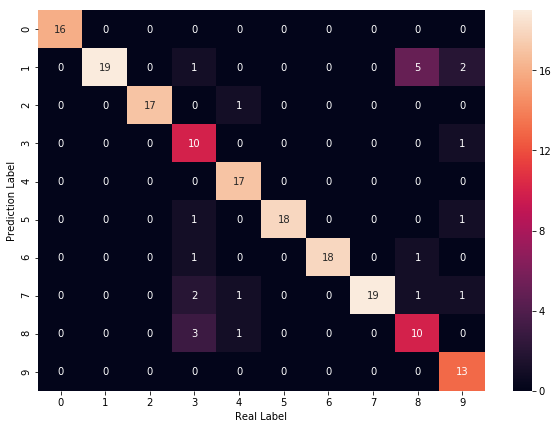

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:23 index:[5] real:5
#1 min_error:32 index:[2] real:2
#2 min_error:27 index:[8] real:8
#3 min_error:6 index:[0] real:0
#4 min_error:18 index:[1] real:1
#5 min_error:12 index:[7] real:7
#6 min_error:9 index:[6] real:6
#7 min_error:20 index:[3] real:3
#8 min_error:14 index:[2] real:2
#9 min_error:18 index:[1] real:1
#10 min_error:25 index:[7] real:7
#11 min_error:32 index:[8] real:4
#12 min_error:8 index:[6] real:6
#13 min_error:26 index:[3] real:3
#14 min_error:20 index:[1] real:1
#15 min_error:31 index:[3] real:3
#16 min_error:33 index:[1 5] real:9
#17 min_error:17 index:[1] real:1
#18 min_error:28 index:[7] real:7
#19 min_error:8 index:[6] real:6
#20 min_error:31 index:[8] real:8
#21 min_error:14 index:[4] real:4
#22 min_error:22 index:[3] real:3
#23 min_error:20 index:[1] real:1
#24 min_error:15 index:[4] real:4
#25 min_error:12 index:[0] real:0
#26 min_error:16 index:[5] real:5
#27 min_error:21 index:[3] real:3
#28 min_error:23 index:[6] real:6
#29 min_error:29 index:[3]

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8886827458256029
Avg Base Learner:0.8028138528138526


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.09444444444444444
Accuracy on training set: 0.15555555555555556
Accuracy on training set: 0.16666666666666666
Accuracy on training set: 0.23333333333333334
Accuracy on training set: 0.3055555555555556
Accuracy on training set: 0.29444444444444445
Accuracy on training set: 0.37222222222222223
Accuracy on training set: 0.4111111111111111
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.6
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6444444444444445
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.65
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.68888

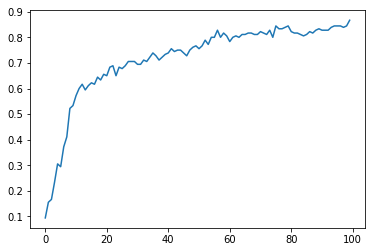

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.09444444444444444,
 0.15555555555555556,
 0.16666666666666666,
 0.23333333333333334,
 0.3055555555555556,
 0.29444444444444445,
 0.37222222222222223,
 0.4111111111111111,
 0.5222222222222223,
 0.5333333333333333,
 0.5722222222222222,
 0.6,
 0.6166666666666667,
 0.5944444444444444,
 0.6111111111111112,
 0.6222222222222222,
 0.6166666666666667,
 0.6444444444444445,
 0.6333333333333333,
 0.6555555555555556,
 0.65,
 0.6833333333333333,
 0.6888888888888889,
 0.65,
 0.6833333333333333,
 0.6777777777777778,
 0.6888888888888889,
 0.7055555555555556,
 0.7055555555555556,
 0.7055555555555556,
 0.6944444444444444,
 0.6944444444444444,
 0.7111111111111111,
 0.7055555555555556,
 0.7222222222222222,
 0.7388888888888889,
 0.7277777777777777,
 0.7111111111111111,
 0.7222222222222222,
 0.7333333333333333,
 0.7388888888888889,
 0.7555555555555555,
 0.7444444444444445,
 0.75,
 0.75,
 0.7388888888888889,
 0.7277777777777777,
 0.75,
 0.7611111111111111,
 0.7666666666666667,
 0.7555555555555555,
 0.76666